In [51]:
import numpy as np 
import pandas as pd 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import (accuracy_score,precision_score,recall_score,confusion_matrix,
plot_confusion_matrix,plot_roc_curve)



In [35]:
# load data
df_patients = pd.read_csv('../data/all.15k.patients.txt',sep = '\t')
df_patients.head()

,dateofbirth,maritalstatus,race,ageatdiagnosis,alivestatus,survivaltime,grade,nodesexam,nodespos,extent,nodalstatus,size,pgr,er
pid00001,28/01/1932,5,2,61,0,110,3,32,3,10,6,60,2,2
pid00002,07/05/1934,2,3,60,0,100,2,13,1,10,6,15,1,1
pid00003,14/04/1921,5,3,76,0,70,3,8,0,10,0,8,1,1
pid00004,08/11/1931,3,3,61,1,31,3,20,0,10,0,10,2,2
pid00005,08/01/1922,2,3,74,1,47,2,16,8,10,6,15,2,1


In [36]:
# calculate correlation between variables
df_patients.corr()['alivestatus']

maritalstatus     0.007629
race             -0.103914
ageatdiagnosis    0.004361
alivestatus       1.000000
survivaltime     -0.652302
grade             0.215818
nodesexam         0.009837
nodespos          0.333624
extent            0.163409
nodalstatus       0.301774
size              0.282724
pgr               0.126428
er                0.125475
Name: alivestatus, dtype: float64

In [37]:
#make train and test set
x_train,x_test,y_train,y_test = train_test_split(df_patients.loc[:,['size','nodespos','grade','nodalstatus','survivaltime']],df_patients['alivestatus'],test_size=0.2,random_state=777,stratify=df_patients['alivestatus'])

In [38]:
# create logistic regression model
model = LogisticRegression()
model = model.fit(x_train,y_train)

In [39]:
# predict from test set
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)

In [40]:
# calculate metrics w training set
mat_train = confusion_matrix(y_pred_train,y_train)
accuracy_train = accuracy_score(y_pred_train,y_train)
precision_train = precision_score(y_pred_train,y_train)
recall_train = recall_score(y_pred_train,y_train)

In [41]:
# calculate metrics w test set
mat = confusion_matrix(y_pred,y_test)
accuracy = accuracy_score(y_pred,y_test)
precision = precision_score(y_pred,y_test)
recall = recall_score(y_pred,y_test)


In [42]:
# find ratio of alive status 0:1
dead = df_patients[df_patients['alivestatus'] == 0]
alive = df_patients[df_patients['alivestatus'] == 1]
dead.shape[0]/alive.shape[0]

y_test[y_test == 0].shape[0]/y_test[y_test == 1].shape[0]

4.44464609800363

Fontconfig warning: ignoring UTF-8: not a valid region tag


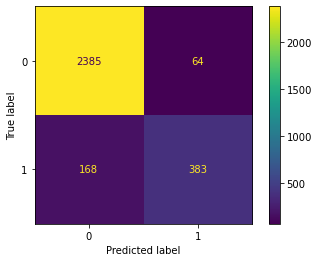

In [49]:
# plot confusion matrxie
plot_confusion_matrix(model,x_test,y_test.values.reshape(-1,1))

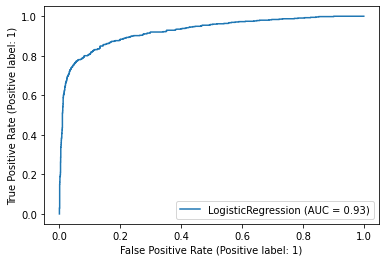

In [50]:
# plot roc curve
plot_roc_curve(model,x_test,y_test.values.reshape(-1,1))

In [55]:
# cross validation to check for overfitting
scores = cross_val_score(model,x_train,y_train)
predictions = cross_val_predict(model,x_train,y_train)
np.mean(scores)
np.std(scores)

0.004746343621966047